In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft, fftshift
import sounddevice as sd
import scipy.io.wavfile as reader
from scipy import signal

## Fourier Transforms

#### Read file

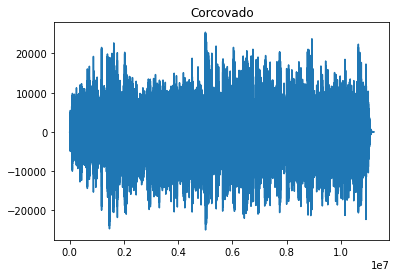

In [3]:
#Read audio file
fs_song, y_song = reader.read('./Corcovado.wav')

#Take single channel
mono_song = y_song[:,1].astype(np.float64)

plot1 = plt.figure(1)
plt.plot(mono_song)
plt.title('Corcovado')

plt.show()
#sd.play(y_song.astype('int16'))

#### Extract the signal from 2:02 - 2:05 second time window

Text(0.5, 1.0, 'Clip on top of original song')

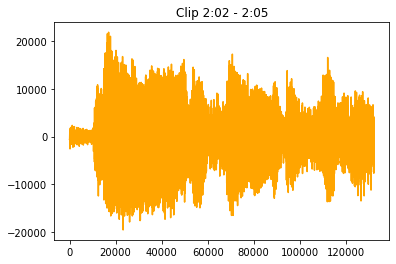

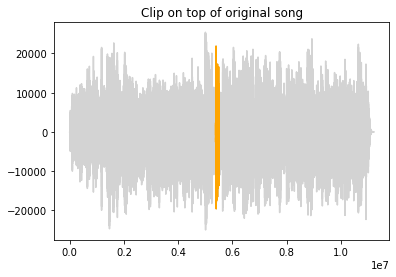

In [8]:
#Find index to trim
start_index = round(122 * fs_song)
end_index = round(125 * fs_song)
clip = mono_song[start_index:end_index]

#Play trimmed song
#sd.play(clip.astype('int16'))

#Plot 
plot1 = plt.figure(1)
plt.plot(clip, color = "orange")
plt.title('Clip 2:02 - 2:05')

#Plot clip on top of song
plot2 = plt.figure(2)
plt.plot(mono_song, color = "lightgray")
plt.plot(np.arange(start_index, end_index), clip, color = "orange")
plt.title('Clip on top of original song')

#### Take the fft of the extracted sound clip

Text(0, 0.5, 'Magnitude')

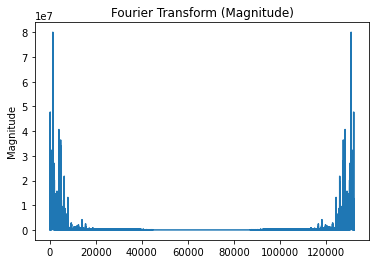

In [9]:
clip_fft = fft(clip)

plot1 = plt.figure(1)
plt.plot(np.absolute(clip_fft))
plt.title('Fourier Transform (Magnitude)')
plt.ylabel('Magnitude')

#### fftshift to move dc component

Text(0, 0.5, 'Magnitude')

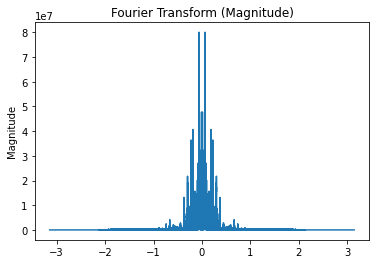

In [10]:
clip_fft_centered = fftshift(clip_fft)
x = np.linspace(-np.pi,np.pi,len(clip))

plot1 = plt.figure(1)
plt.plot(x, np.absolute(clip_fft_centered))
plt.title('Fourier Transform (Magnitude)')
plt.ylabel('Magnitude')

#### Find the dominant frequency

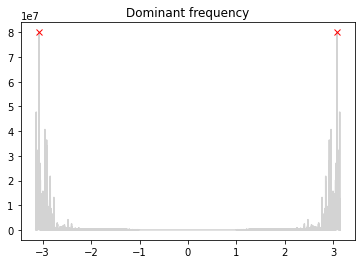

In [11]:
peaks, _ = signal.find_peaks(np.absolute(clip_fft), height = 8e7)
dominant_x = [x[peaks[0]], x[peaks[1]]]

plot1 = plt.figure(1)
plt.plot(x, np.absolute(clip_fft), color = "lightgray")
plt.plot(dominant_x, np.absolute(clip_fft)[peaks], "x", color = "red")
plt.title('Dominant frequency')
plt.show()

In [12]:
freqs = np.fft.fftfreq(len(clip), d = 1/fs_song)
dominant_f = [freqs[peaks[0]], freqs[peaks[1]]]
print("Dominant Frequency:")
dominant_f[0]

Dominant Frequency:


439.3333333333333

#### Play the dominant frequency

In [13]:
def SineSignal(freq,amp=1,phase=0, start_time = 0, end_time=2, Fs = 44100):
    t = np.linspace(start_time, end_time, int((end_time - start_time)*Fs))
    y = amp*np.sin(2*np.pi*freq*t + phase)
    return y, t

In [14]:
amp = 10000
[y, t] = SineSignal(dominant_f[0], amp, 0, 0, 3)
sd.play(y.astype('int16'))